In [1]:
from os import path
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from skimage import io
import numpy as np 

plt.rcParams["font.family"] = ""

In [2]:
track_df = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/track_df_updated.pkl')
filtered_tracks = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/self/files/filtered_tracks.pkl')

In [5]:
track_df.head()

frame  index   amplitude  mu_x   mu_y  mu_z  sigma_x  sigma_y  sigma_z  \
0      0      0  206.593249  11.0   12.0   0.0      2.0      2.0      4.0   
1      0      1  191.000000  36.0   88.0   1.0      2.0      1.0      2.0   
2      0      2  231.007679  40.0  141.0   1.0      2.0      2.0      2.0   
3      0      3  185.152538  40.0   58.0   1.0      2.0      1.0      3.0   
4      0      4  202.000000  46.0   73.0   1.0      2.0      2.0      3.0   

   frame_y  ...  track_id      c2_amp  c2_peak  c2_peak_x  c2_peak_y  \
0        0  ...         0  122.947826    152.0        9.0       14.0   
1        0  ...         1  116.233333    143.0       34.0       87.0   
2        0  ...         2  122.330000    142.0       41.0      142.0   
3        0  ...         3  117.626667    142.0       42.0       59.0   
4        0  ...         4  115.112000    141.0       45.0       74.0   

   c2_peak_z  c3_mean_amp  c2_peak_mean  c2_voxel_sum  c3_voxel_sum  
0        2.0   163.682353    125.500000       11295.0       13913.0  
1        2.0   138.233333    114.826667        8612.0        8294.0  
2        0.0   153.940000    122.853333        9214.0       15394.0  
3        0.0   141.280000    118.016667        7081.0       10596.0  
4        3.0   147.768000    115.502857       20213.0       18471.0  

[5 rows x 21 columns]

In [4]:
filtered_tracks.head()

track_id  c2_peak  track_length  start_frame  end_frame  peak_frame  \
5         36    202.0            34            0         33          17   
17        73    224.0             8            0          7           6   
21        79    203.0            12            0         11          10   
25        91    326.0            21            0         20          19   
41       129    185.0            18            0         17           7   

    peak_start  
5           17  
17           6  
21          10  
25          19  
41           7

In [32]:
def random_track_ids(df, desired_length, num_to_select=16):
    """
    Randomly selects track_ids of a desired length from a DataFrame.

    Parameters:
    - df: DataFrame with 'track_id' and 'length' columns.
    - desired_length: The desired length of tracks to select.
    - num_to_select: The number of track_ids to randomly select (default is 16).

    Returns:
    - List of randomly selected track_ids.
    """
    # Filter the DataFrame for tracks with the desired length
    tracks_of_desired_length = df[(df['track_length'] >= desired_length[0]) & 
                                  (df['track_length'] <= desired_length[1]) ]

    # Determine the number of tracks available for the desired length
    num_tracks_available = len(tracks_of_desired_length)

    # Determine the number of tracks to randomly select (minimum of num_to_select or available tracks)
    num_tracks_to_select = min(num_to_select, num_tracks_available)

    if num_tracks_to_select > 0:
        # Randomly select track_ids
        selected_track_ids = np.random.choice(tracks_of_desired_length['track_id'], num_tracks_to_select, replace=False)
        return selected_track_ids
    else:
        print(f"No tracks of length {desired_length} available.")
        return []

In [54]:
selected_tracks = random_track_ids(filtered_tracks, desired_length = [10,20], num_to_select=64)

In [55]:
selected_tracks

array([  679, 11517, 10264, 11063,   255,   129,  6700,  4280,  3255,
        9476, 11787,  7008,  4481,   831,  1138,  5735,   705,  2883,
        4049,  2612, 14346,  1608, 14258,   842,   843,  3039,  9917,
       11832,  6468,  5239,  9717,  1633,  7487, 16598, 17021,  4954,
        2466,  8690,  8281,  7970, 13122,  7251, 17409, 10550,  2309,
       17004, 16787,  1744,  1188, 10926, 13098,  1609, 13124,  6749,
       13272,  4202, 12605,  1517,  5475, 15072,  4575, 10553,  6007,
        5441])

# For track length 10-20

# Plotting Channel 2 and Channel 3 peaks

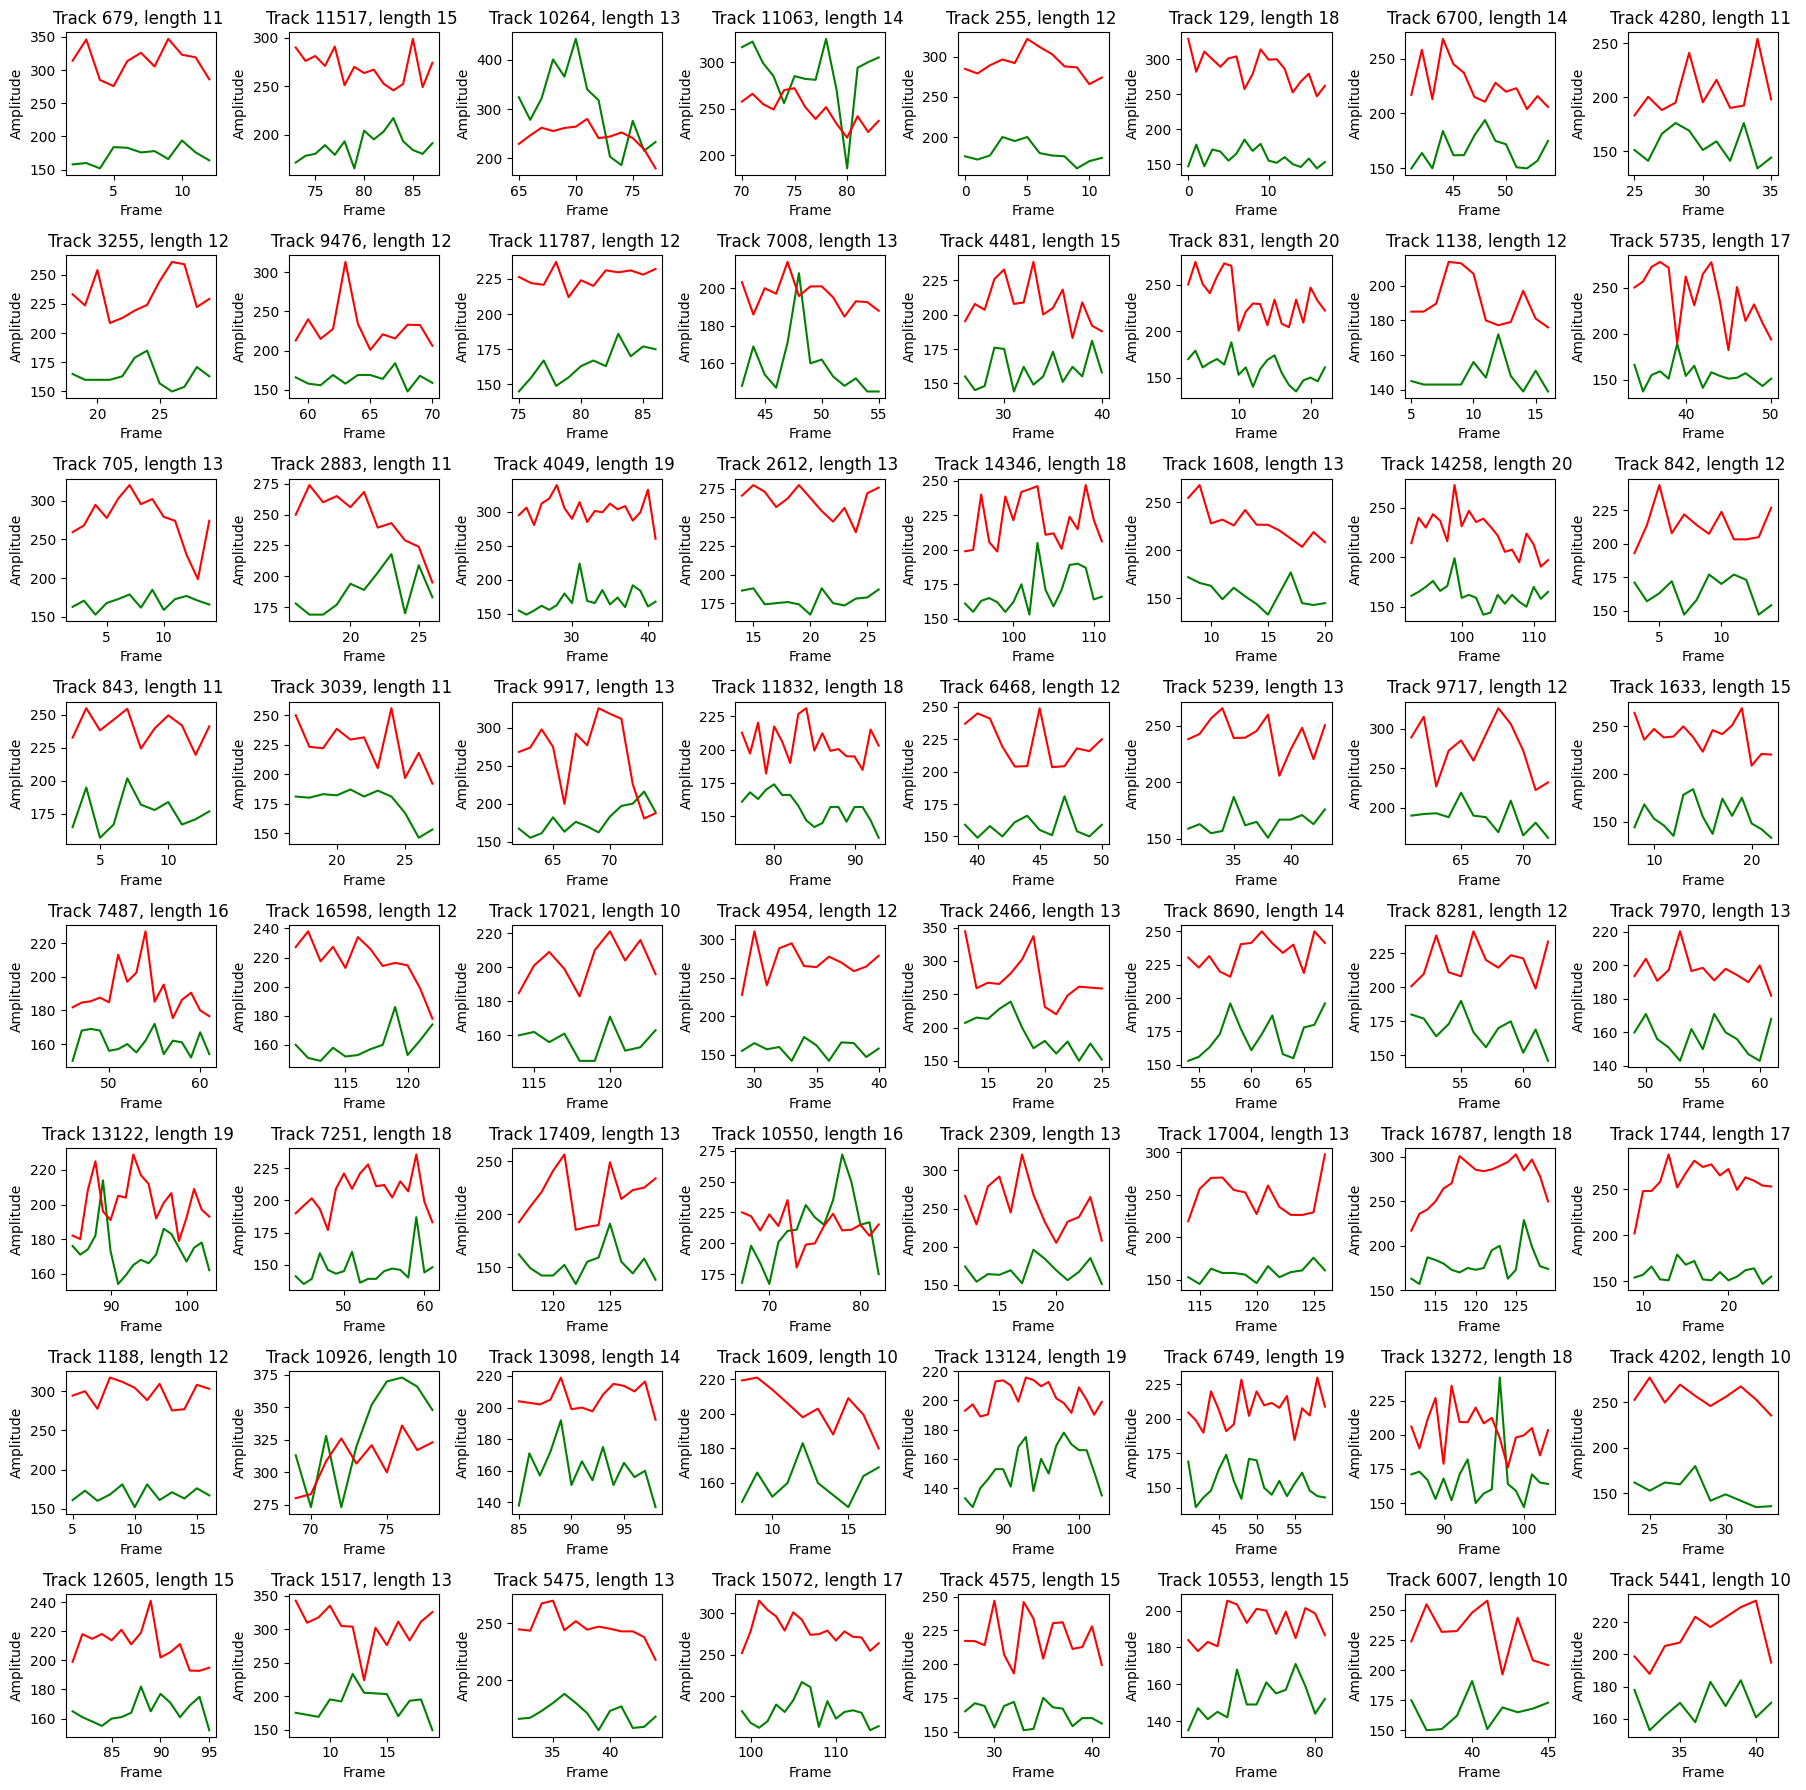

In [64]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_peak'], label='c2_peak', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['amplitude'], label='c3_peak', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]} ')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Plotting Channel 2 and Channel 3 means 

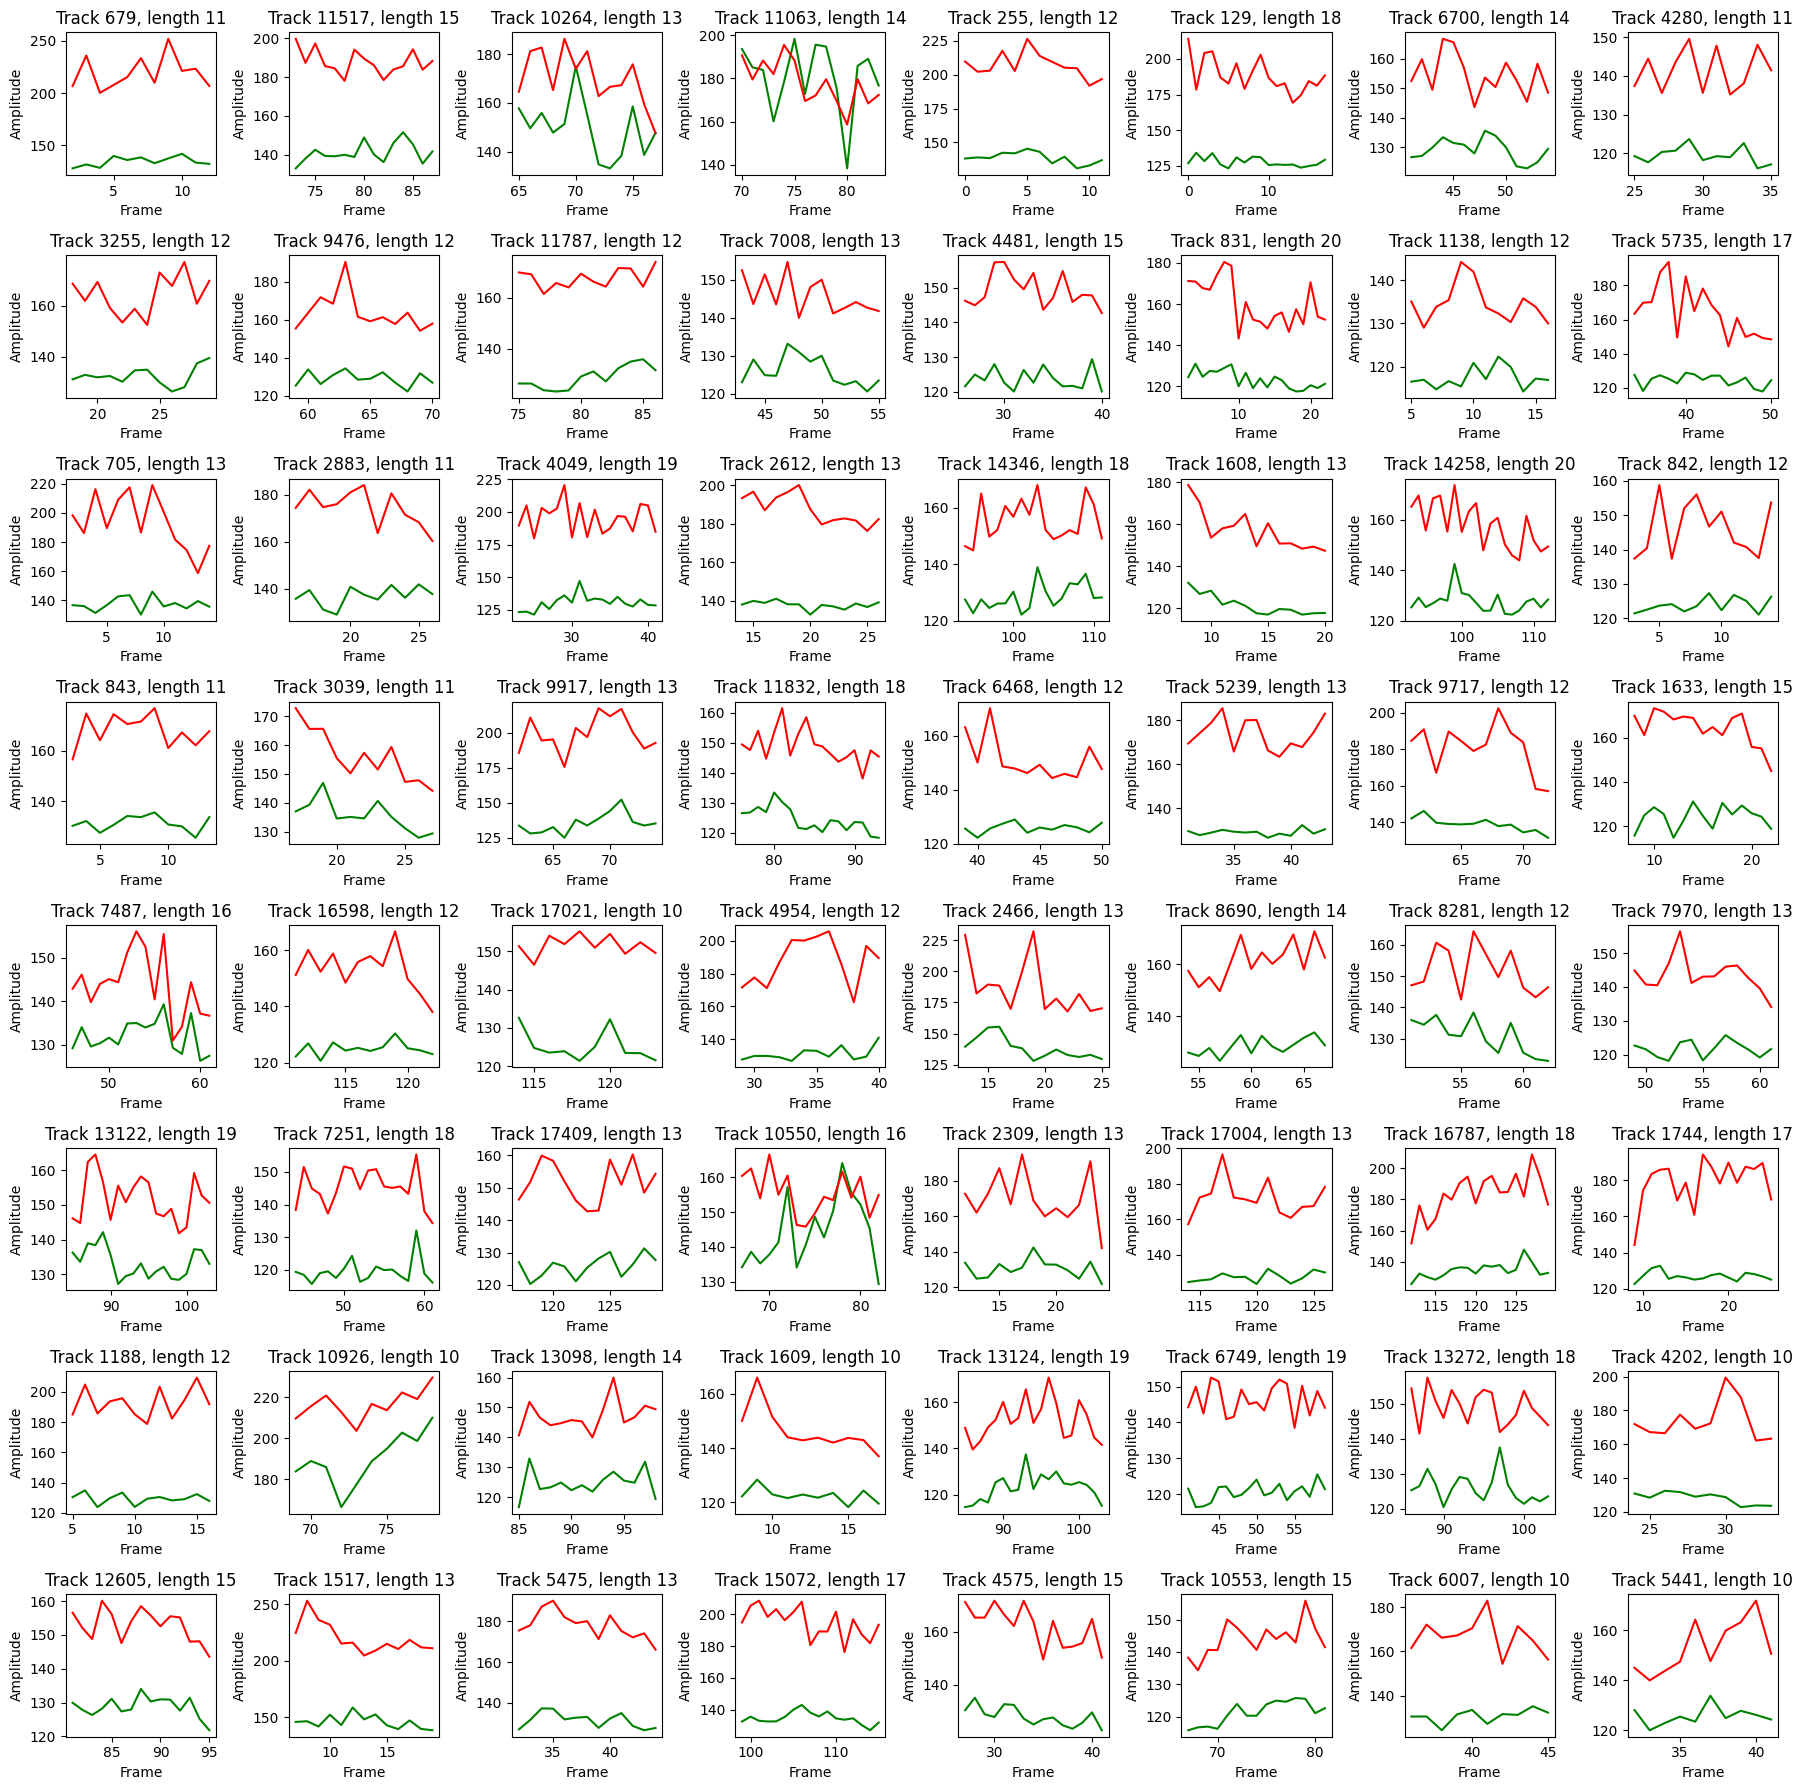

In [67]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Plotting Channel 2 and Channel 3 Voxel sums 

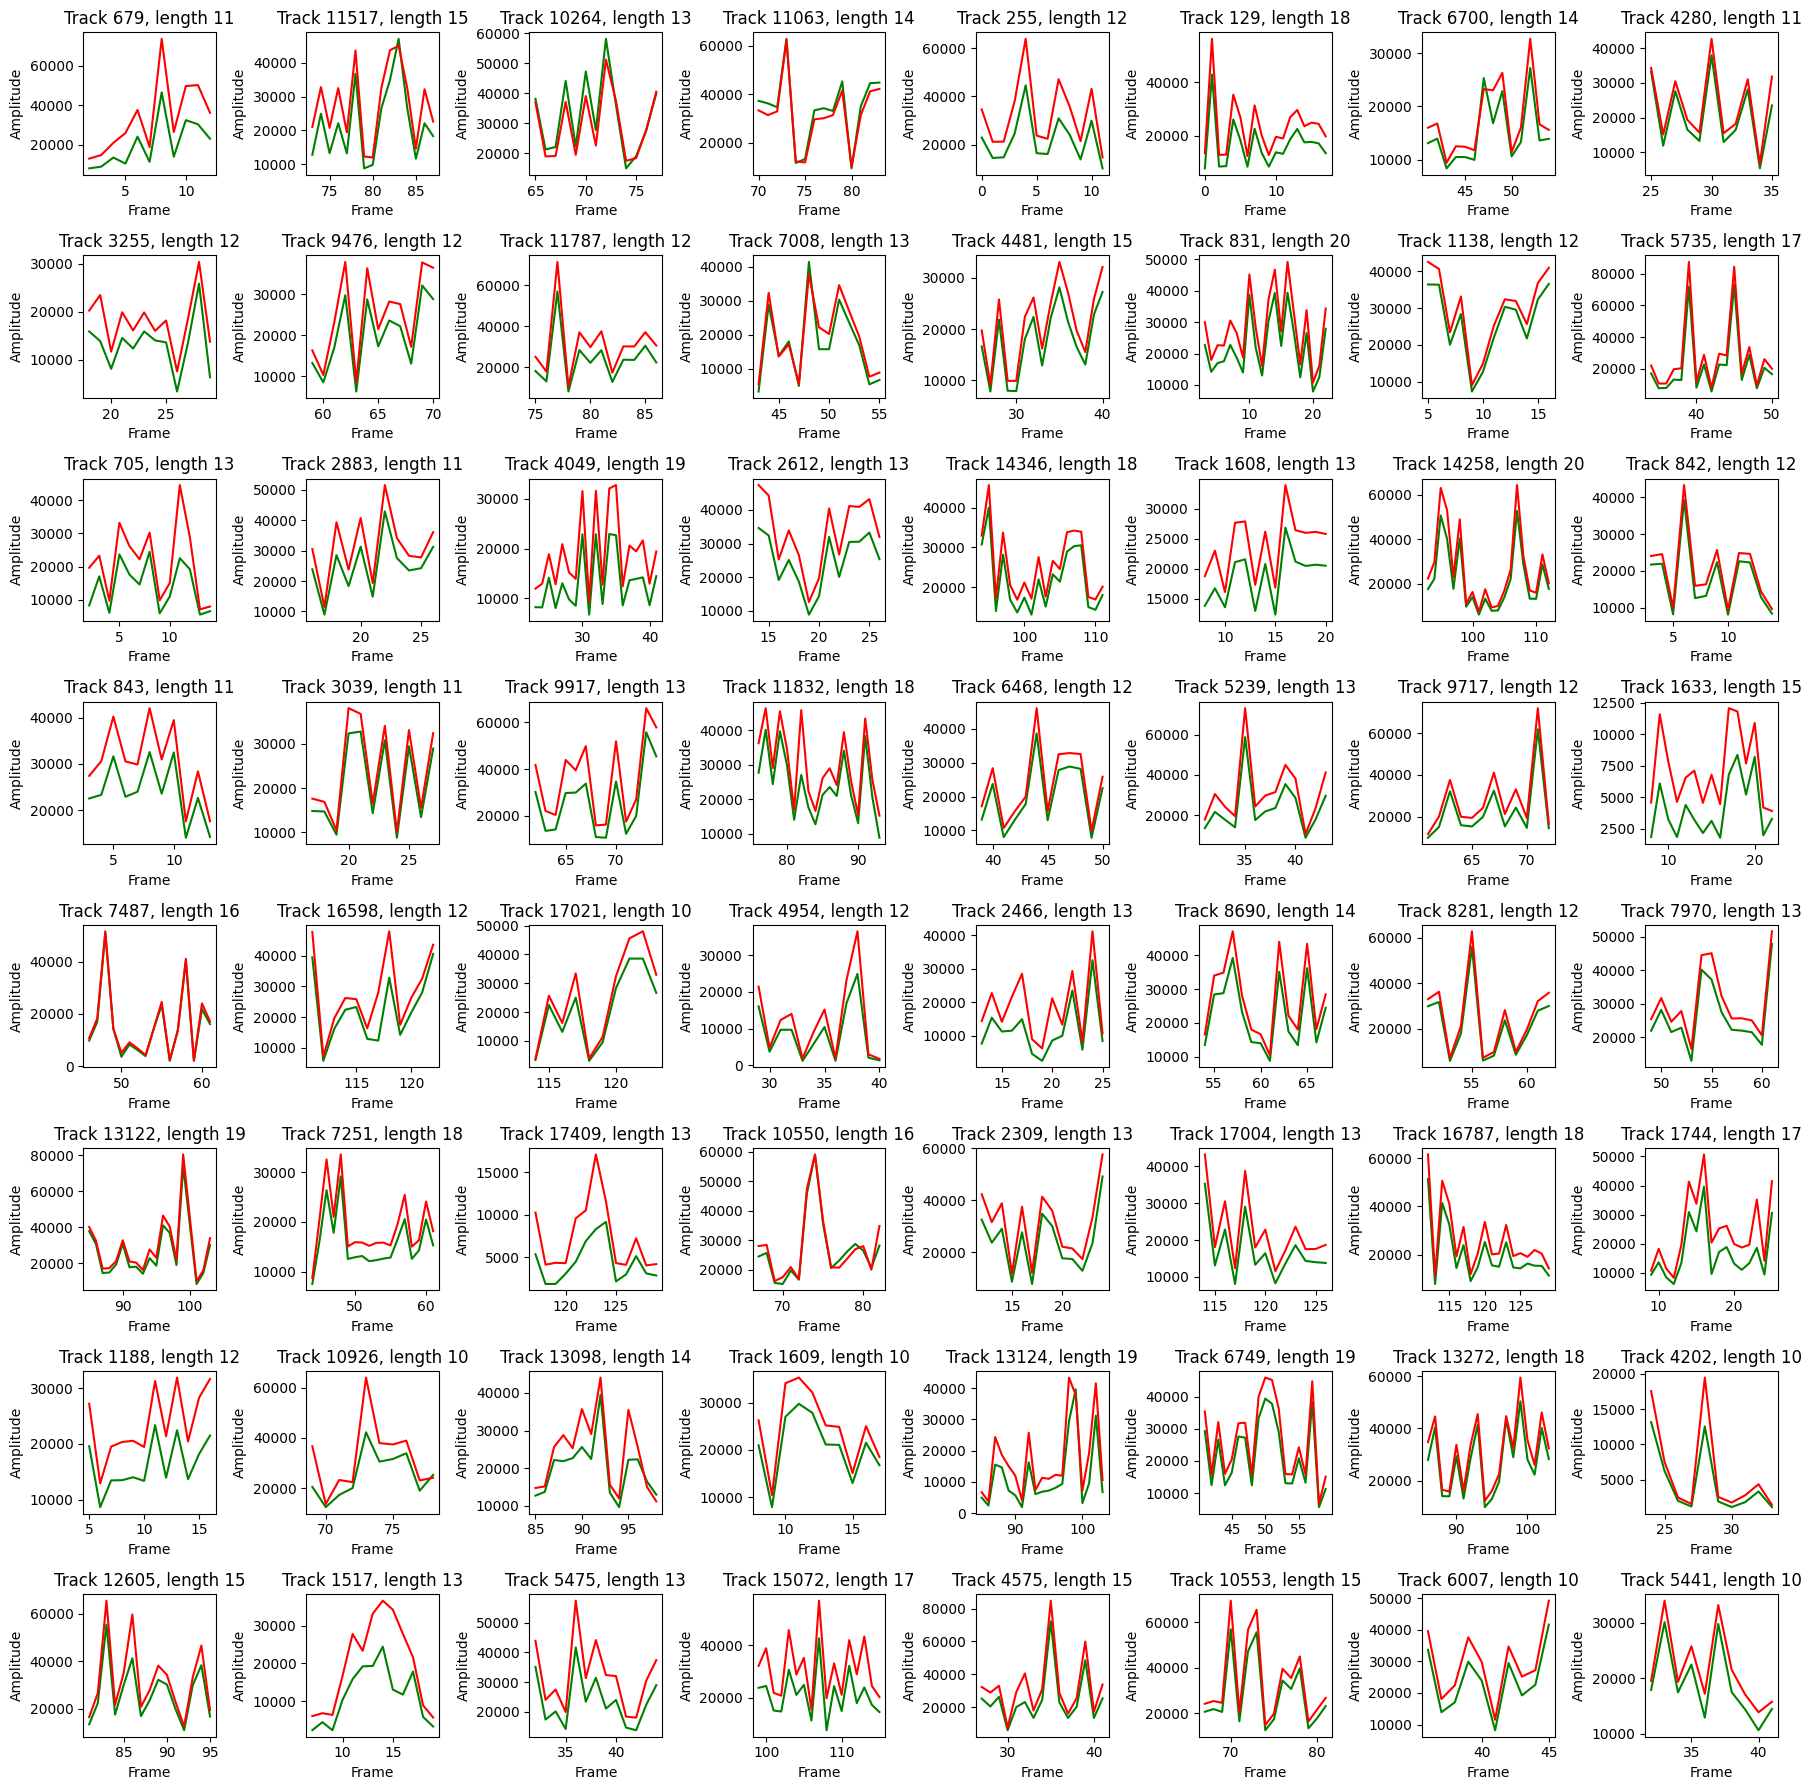

In [68]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_voxel_sum'], label='c2_voxel', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_voxel_sum'], label='c3_voxel', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# For track length 21-30

In [70]:
selected_tracks_medium = random_track_ids(filtered_tracks, desired_length = [21,30], num_to_select=64)
print(len(selected_tracks_medium))

64


# Peaks 

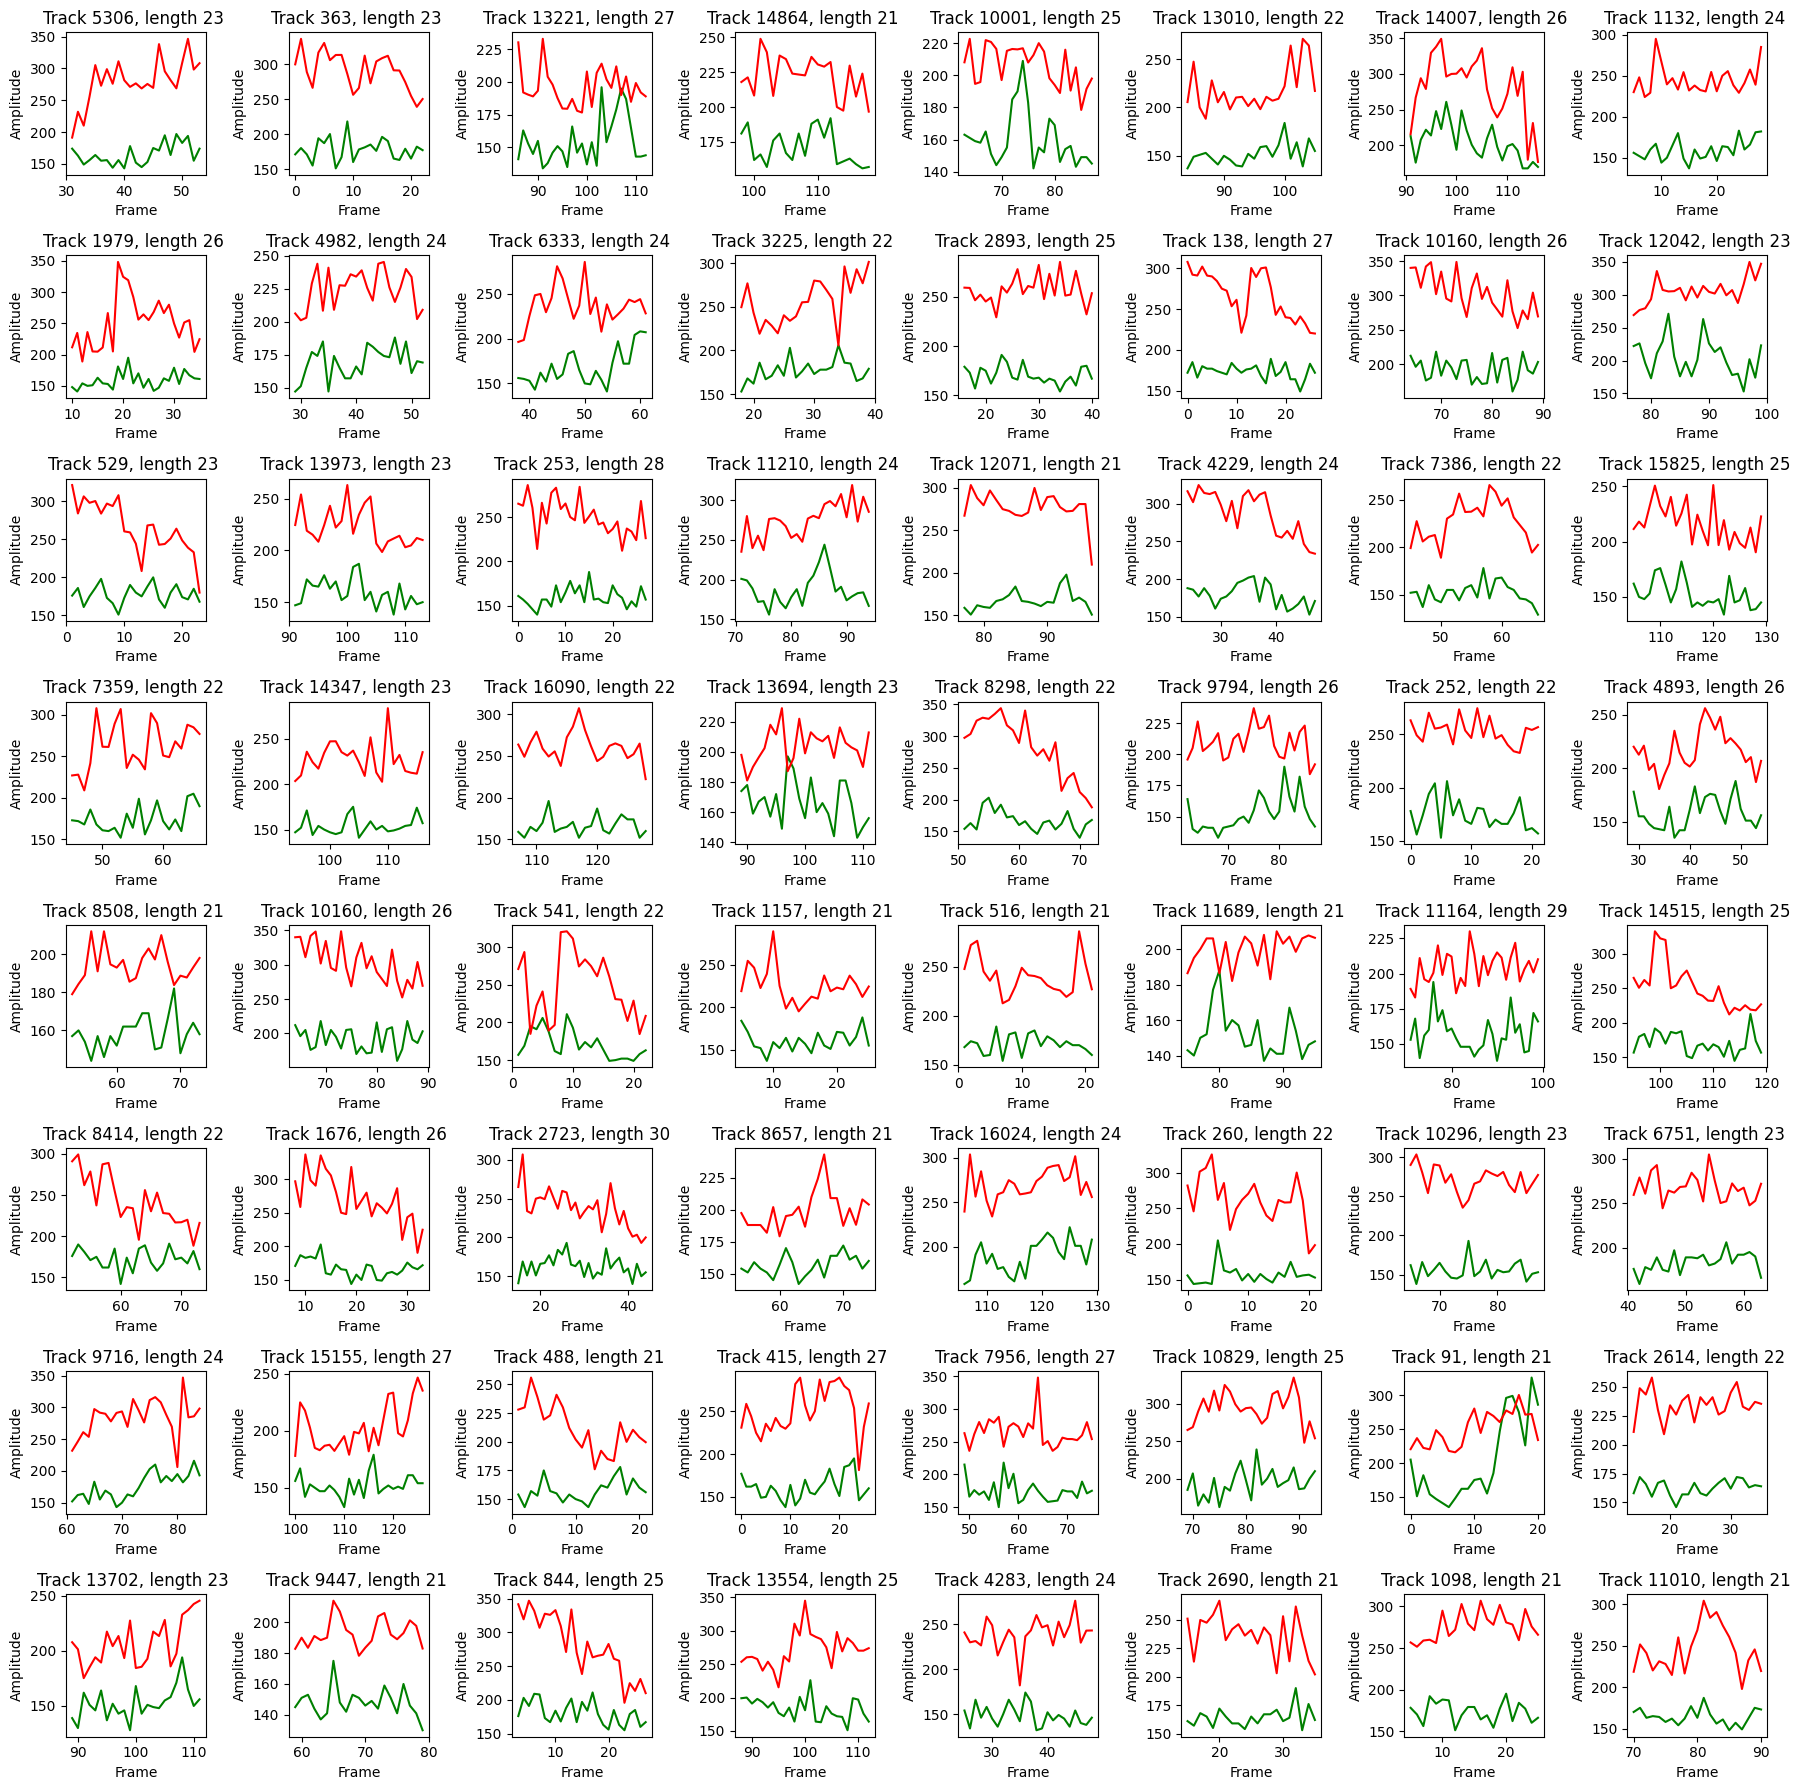

In [71]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_medium):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_peak'], label='c2_peak', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['amplitude'], label='c3_peak', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]} ')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Means 

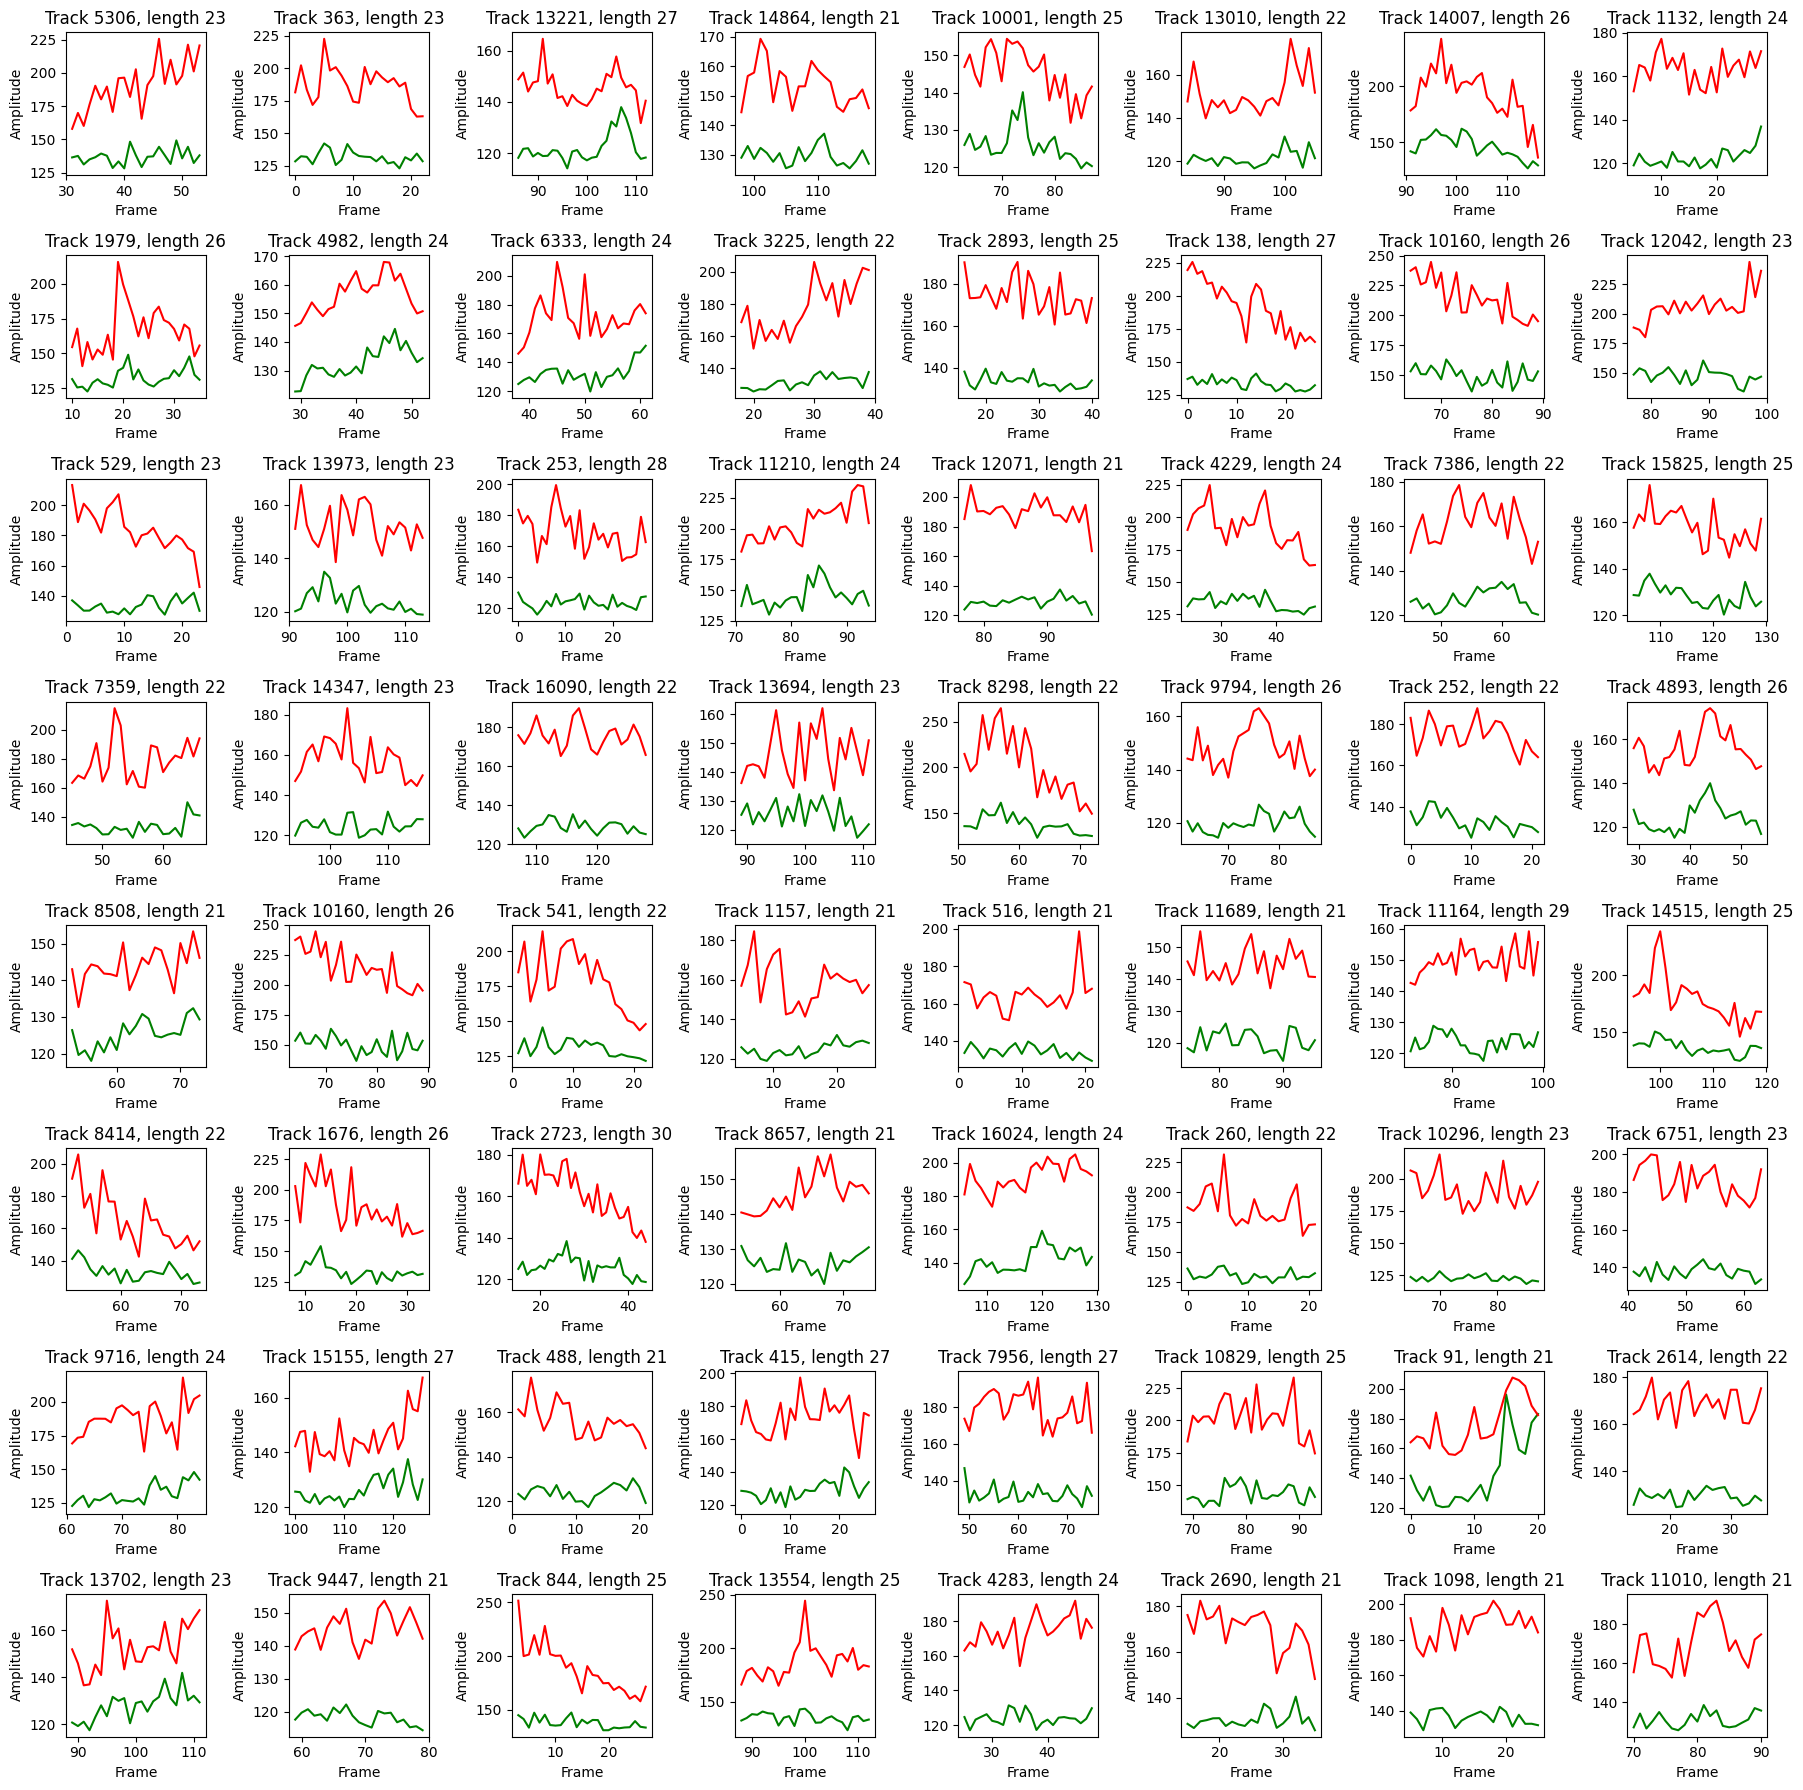

In [72]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_medium):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Voxel Sums

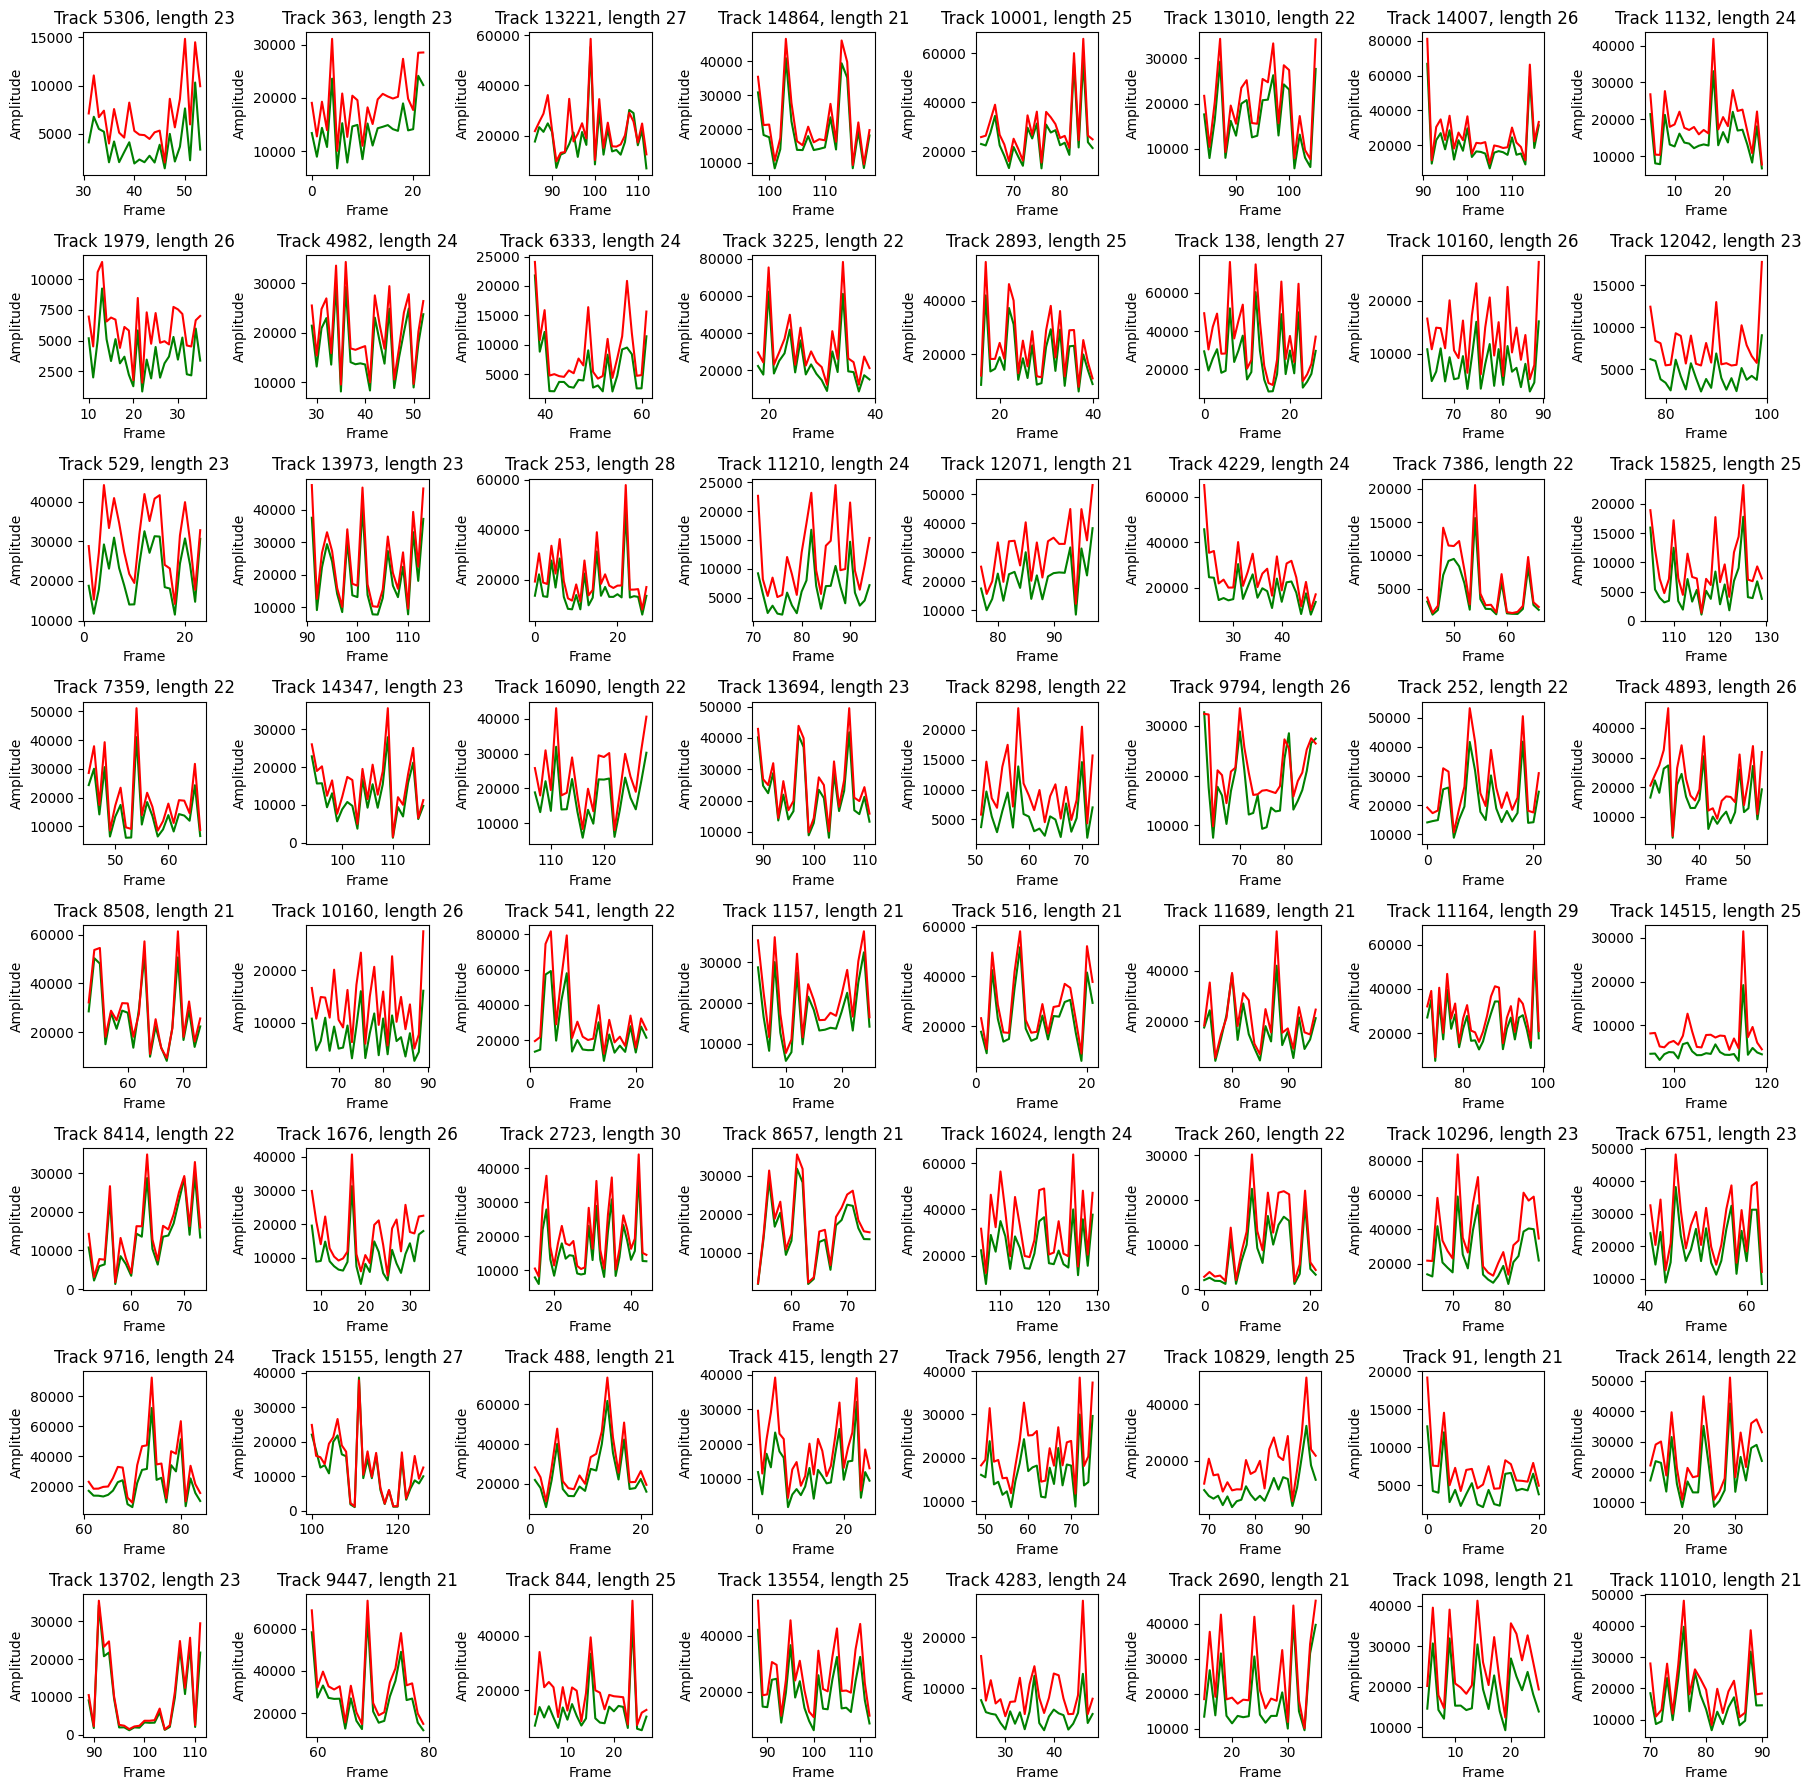

In [73]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 8
num_cols = 8
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_medium):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_voxel_sum'], label='c2_voxel', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_voxel_sum'], label='c3_voxel', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# For tracks with lengths 31-40

In [74]:
selected_tracks_long = random_track_ids(filtered_tracks, desired_length = [31,40], num_to_select=64)
print(len(selected_tracks_long))

19


# Peaks

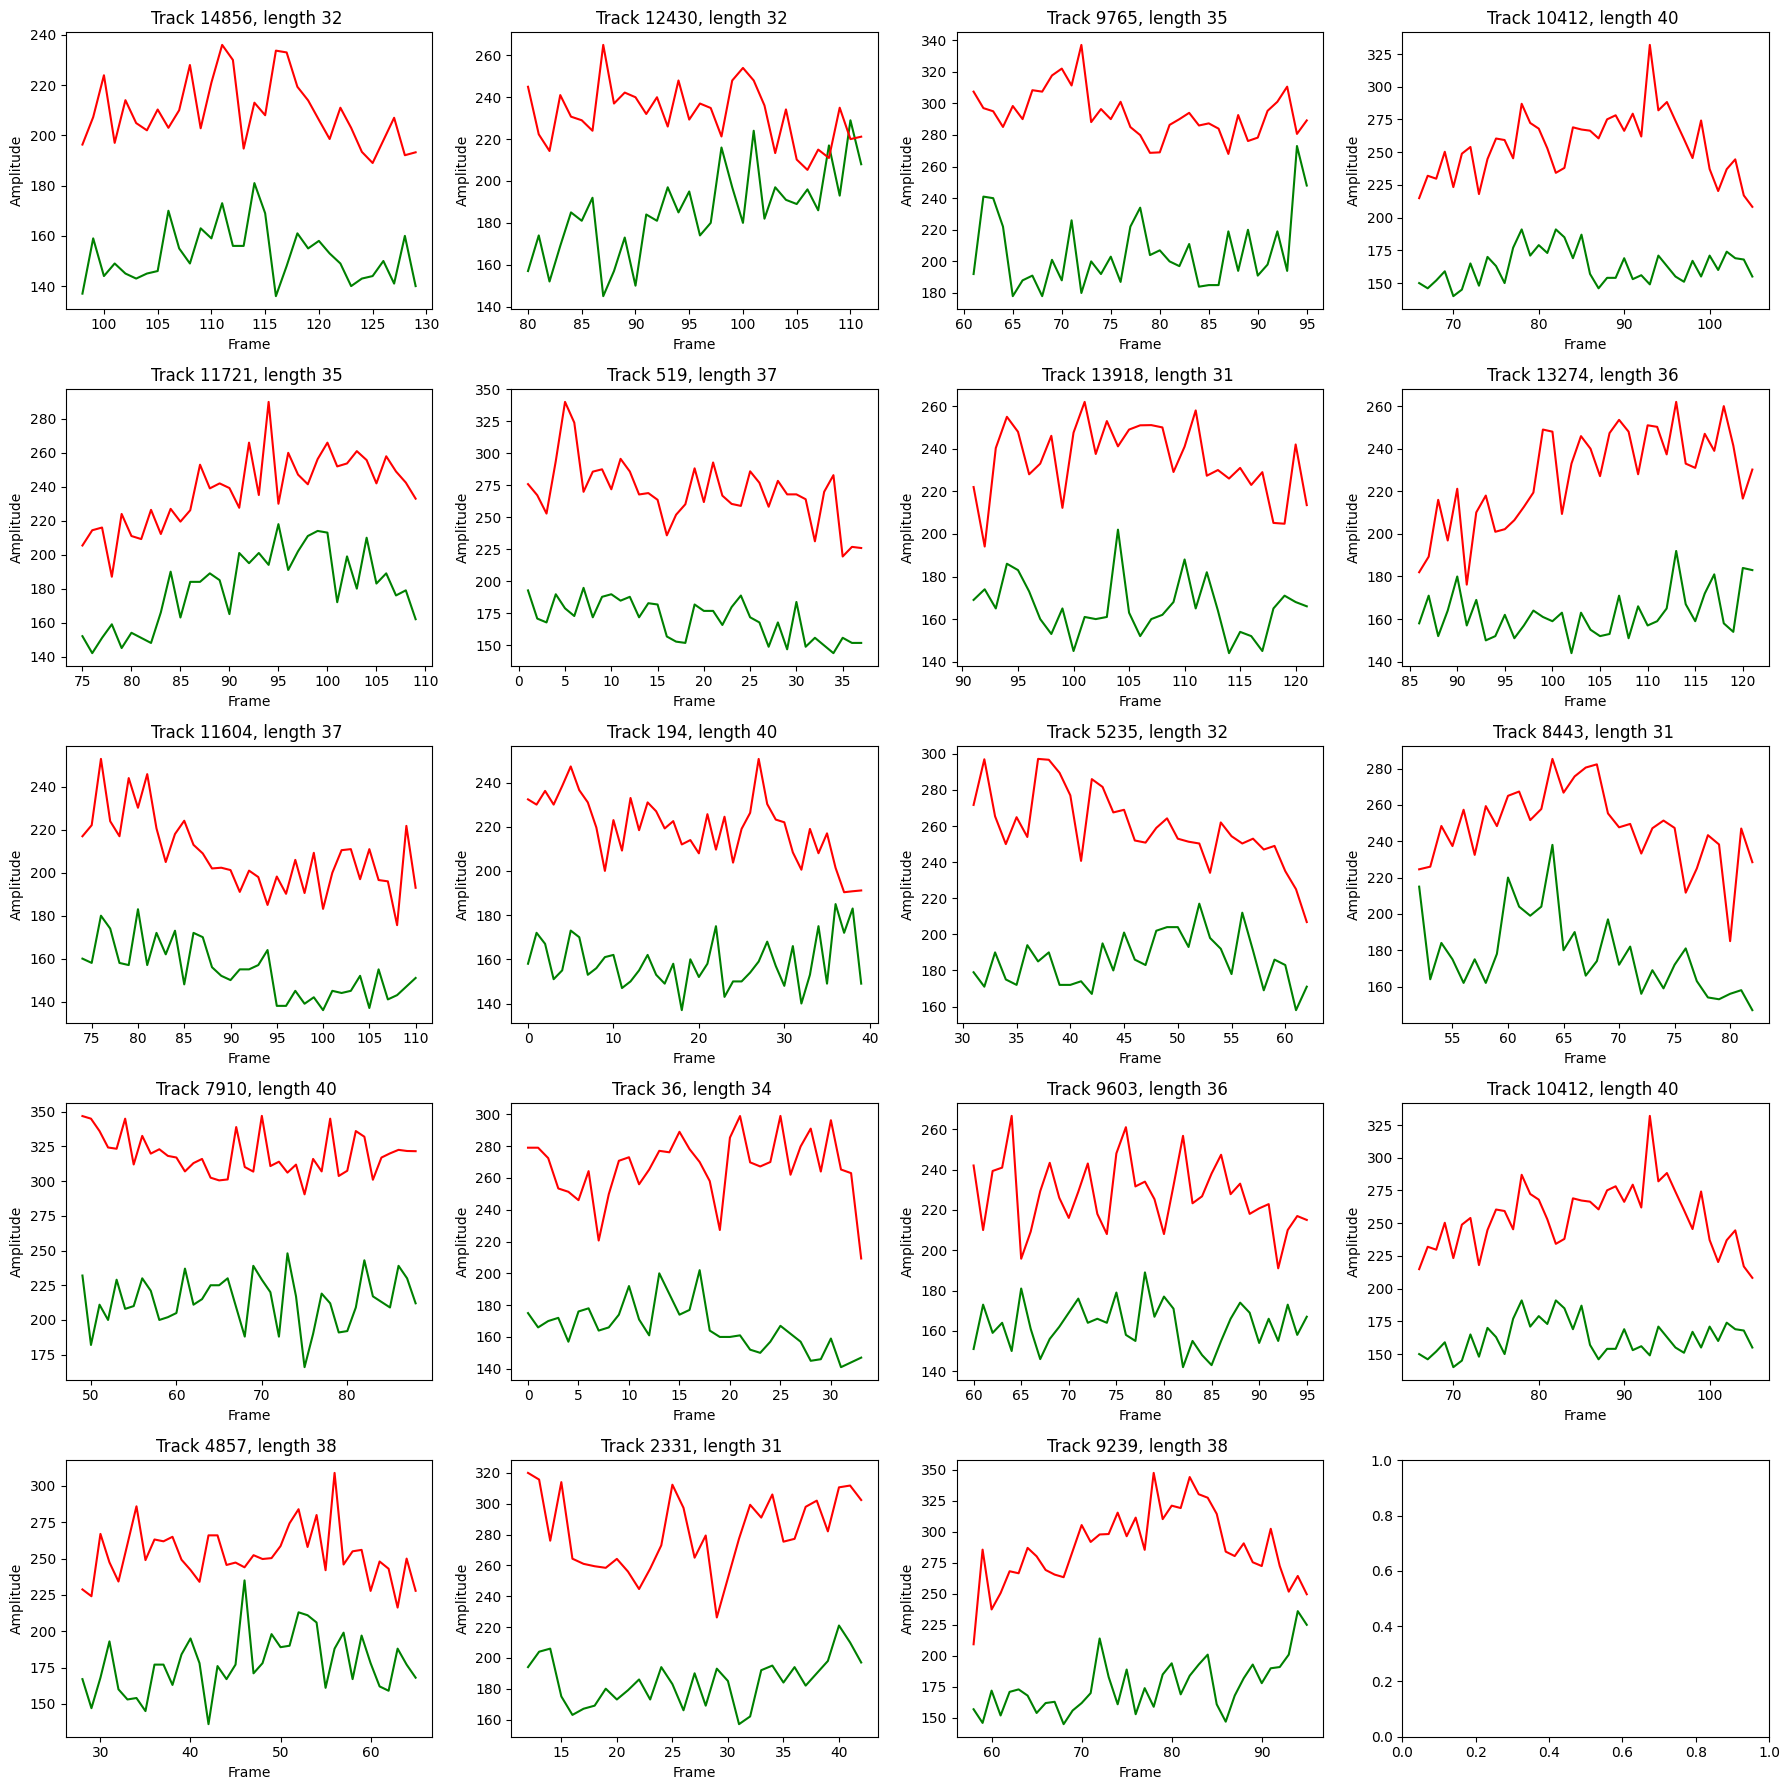

In [75]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_long):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_peak'], label='c2_peak', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['amplitude'], label='c3_peak', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]} ')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Means 

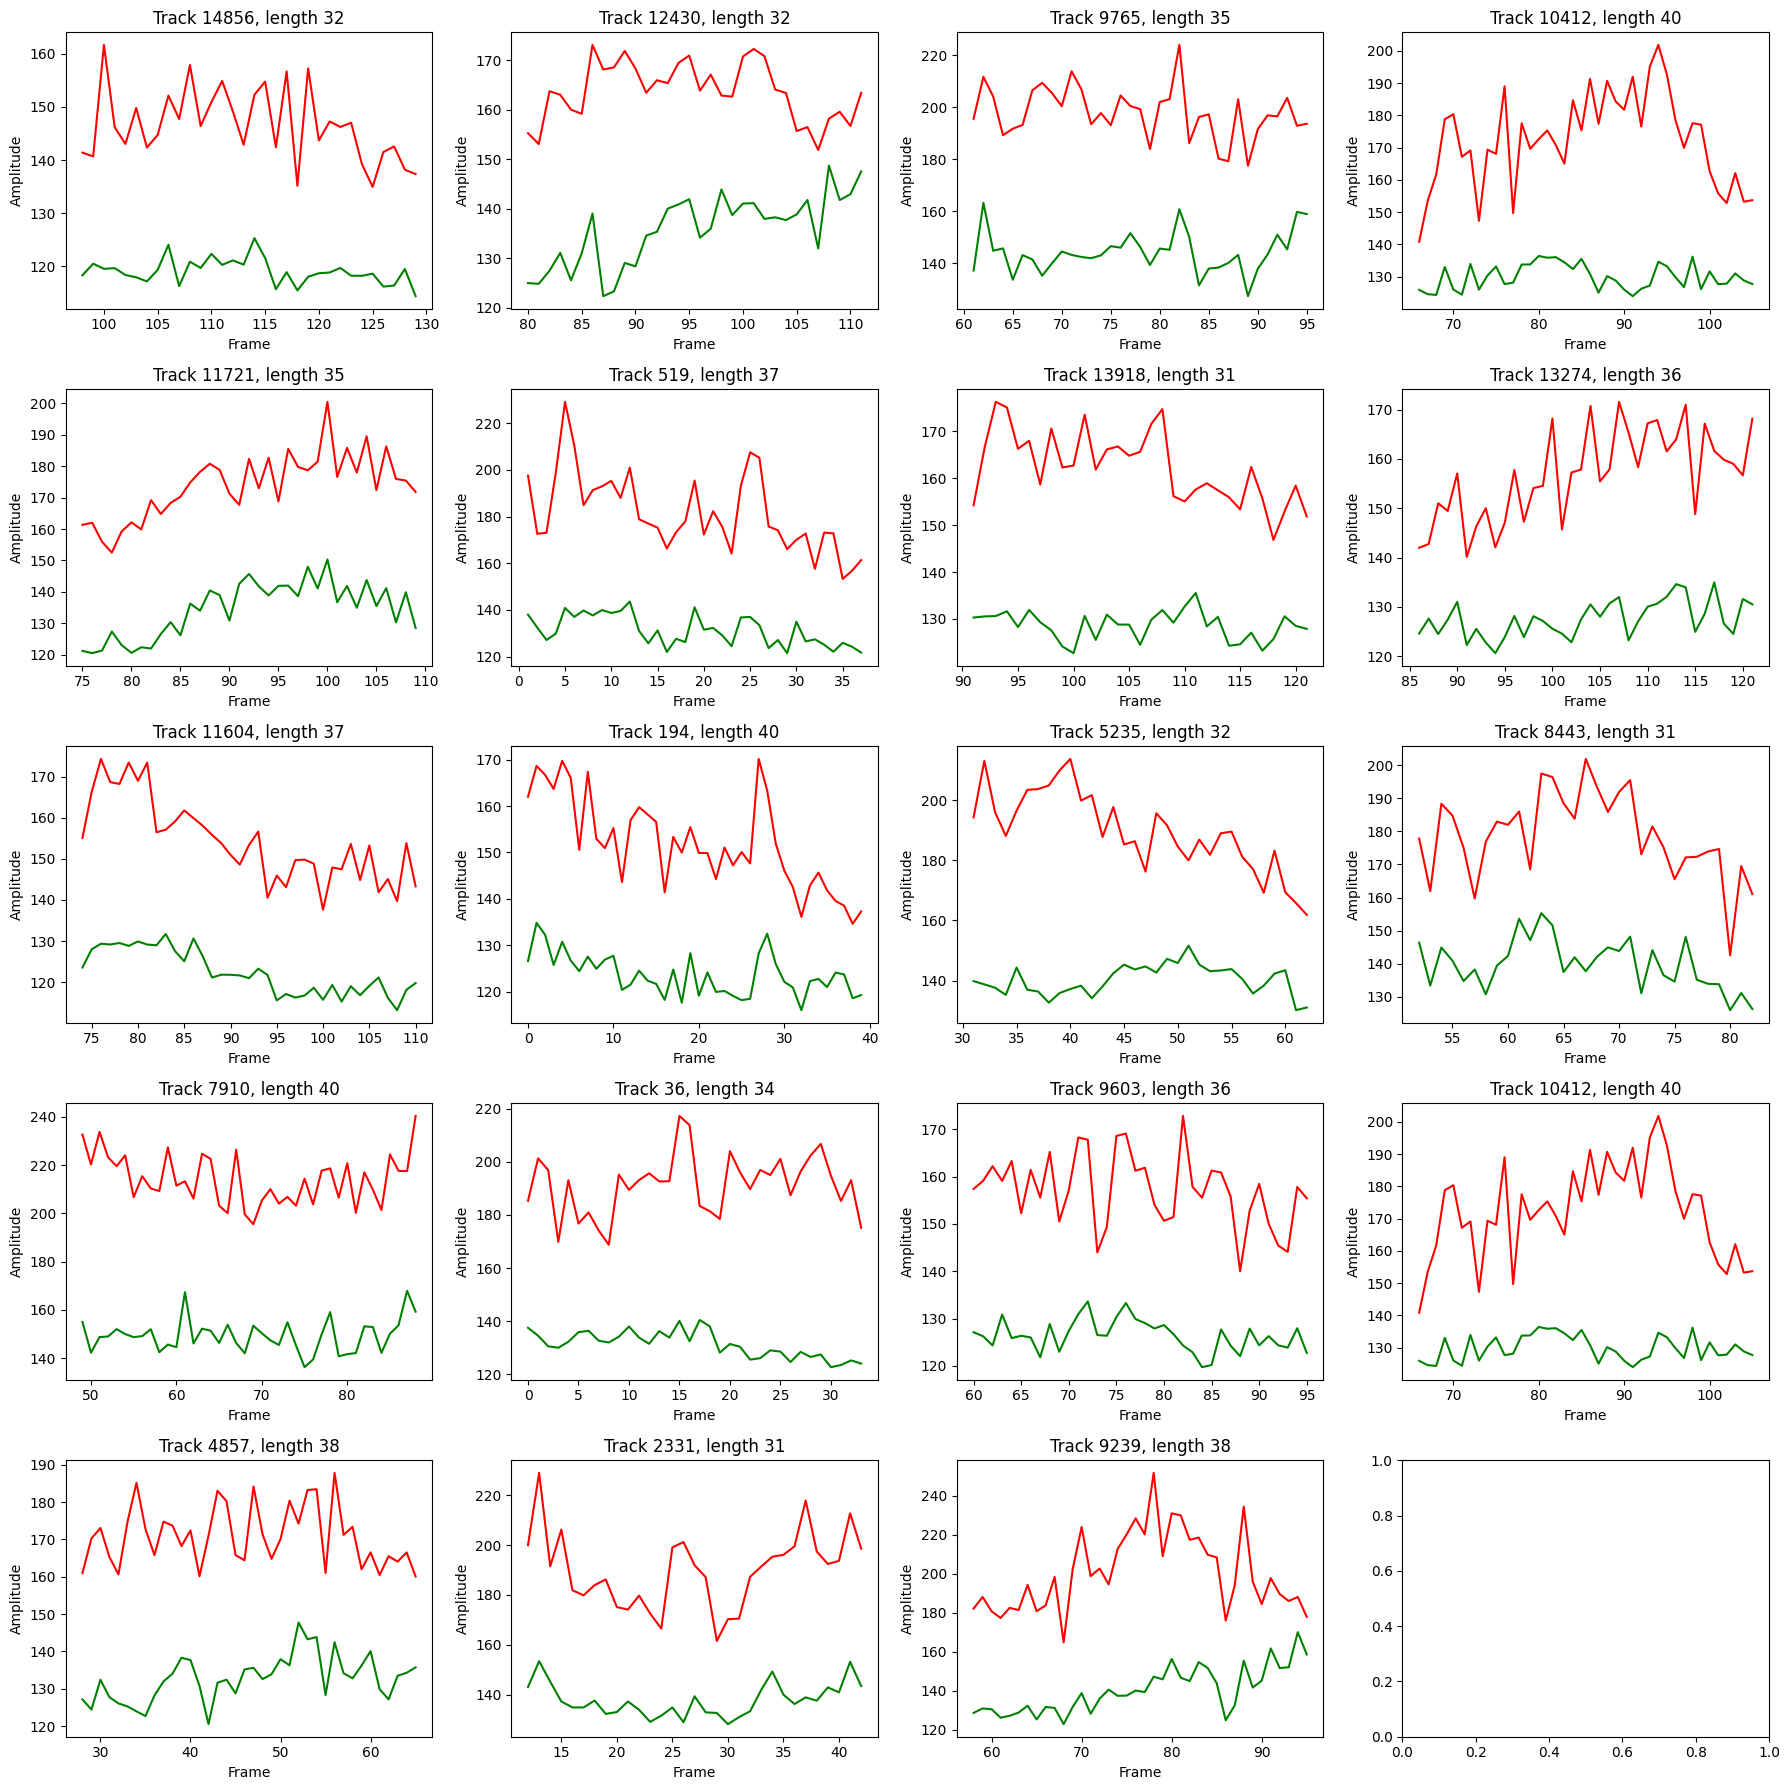

In [76]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 5
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_long):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_amp'], label='c2_mean', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_mean_amp'], label='c3_mean', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Voxel Sums 

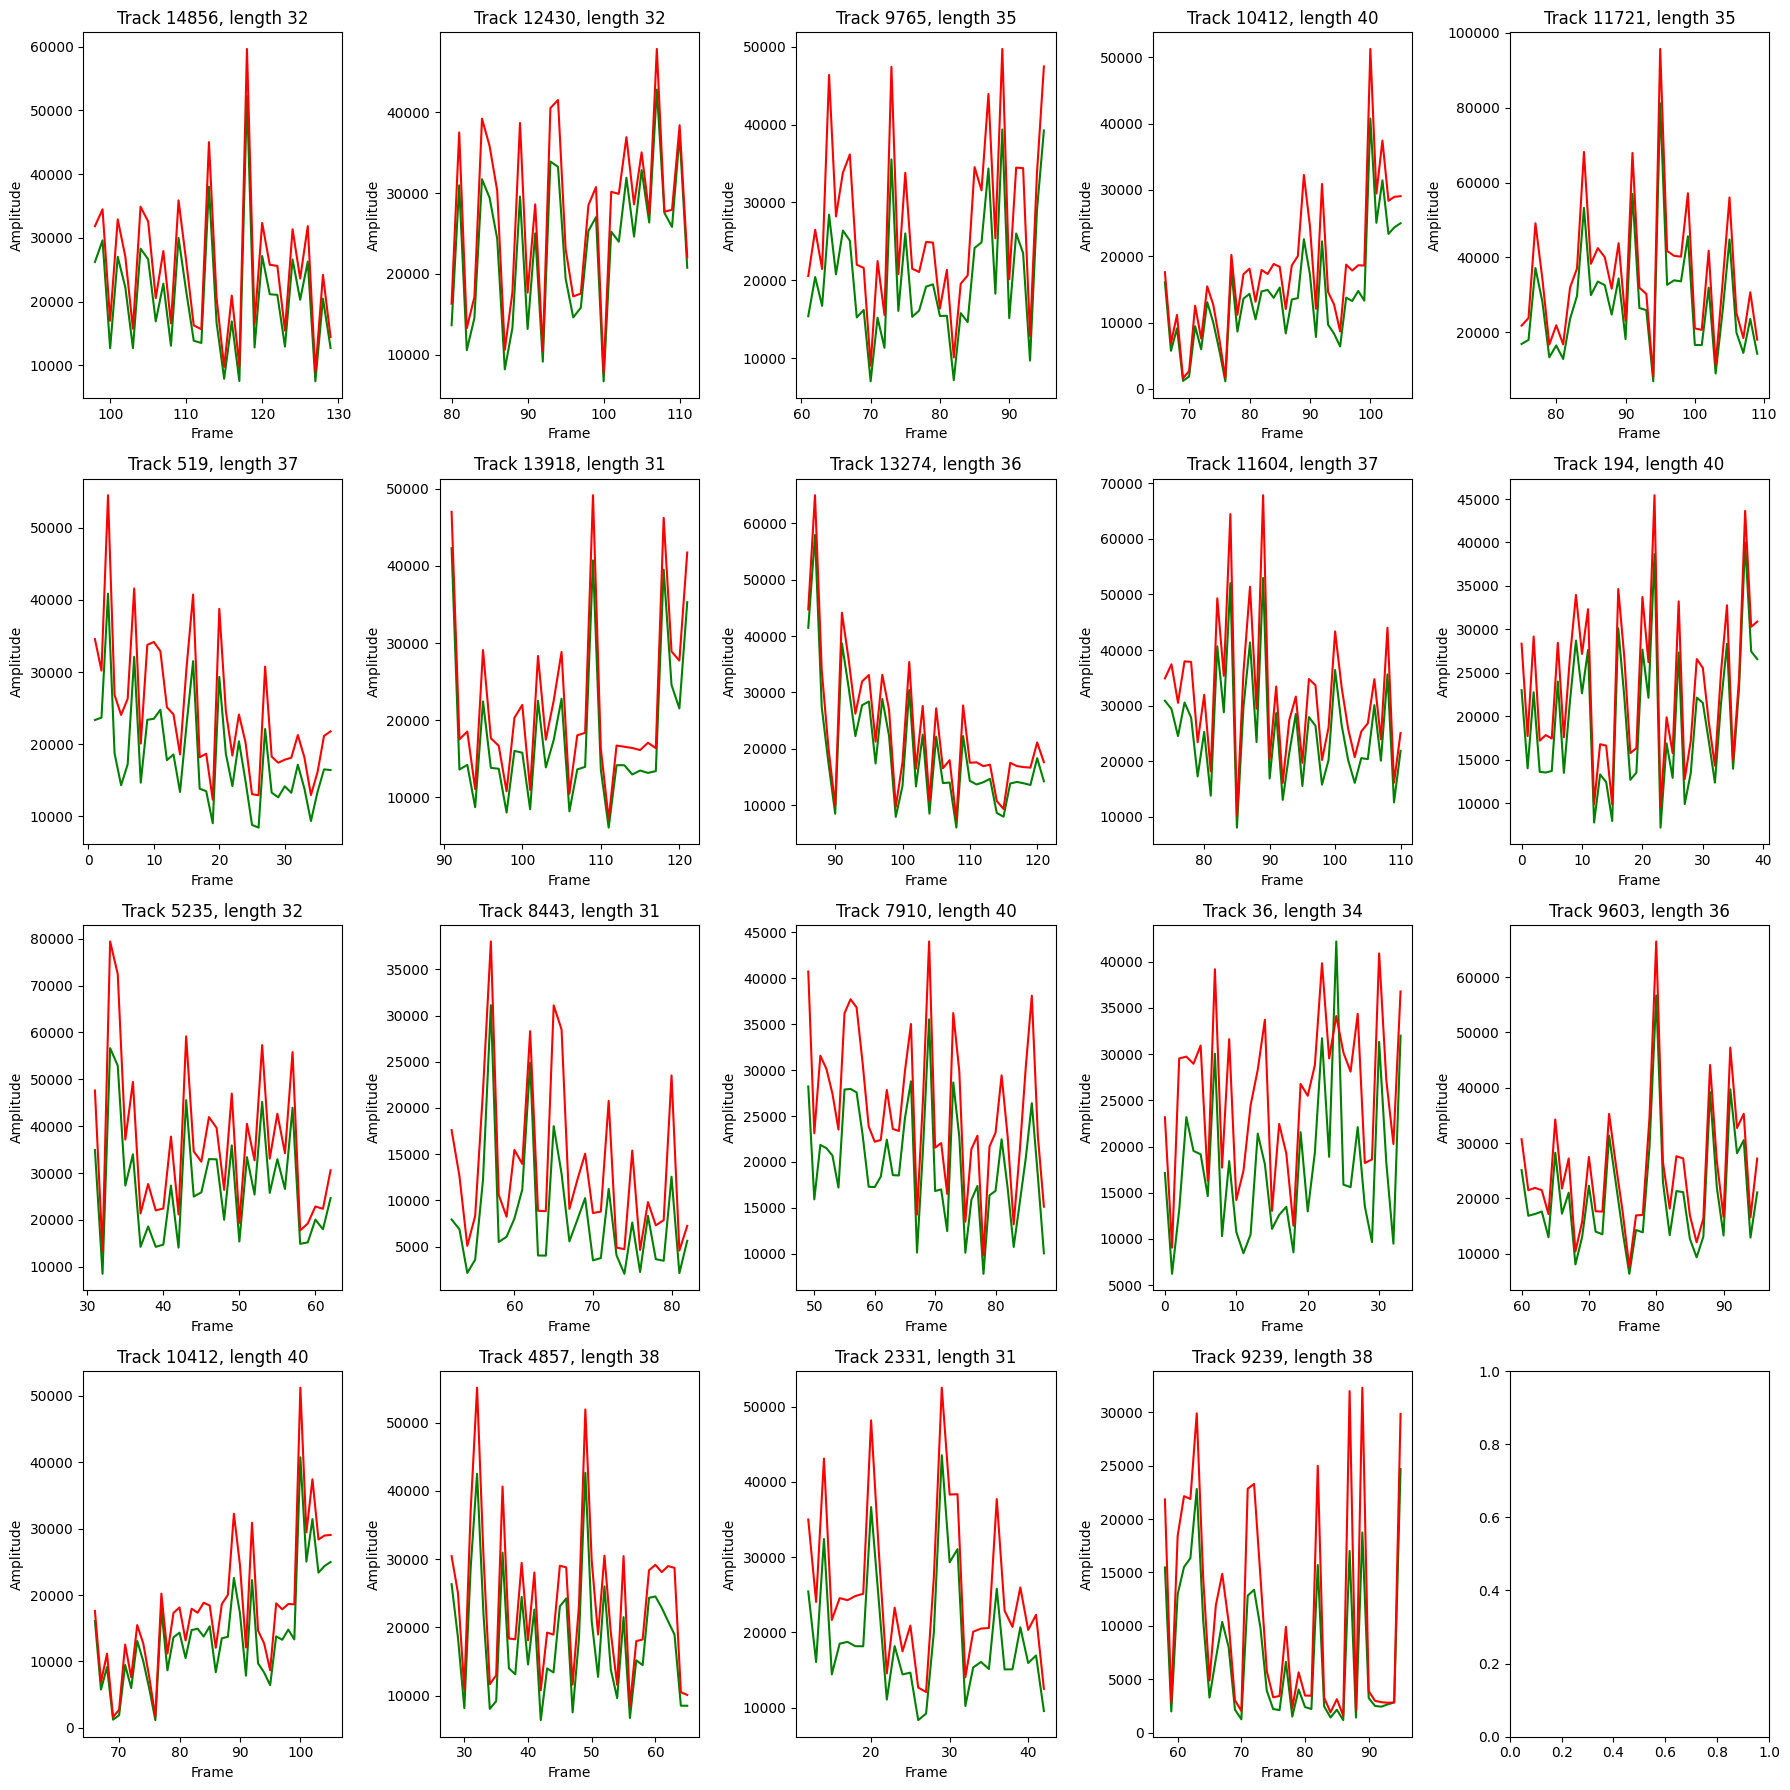

In [77]:
# Plotting time series for c2_amp and c3_amp on the same subplot for each selected track in a 6 by 6 grid
num_rows = 4
num_cols = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

for i, track_id in enumerate(selected_tracks_long):
    # Filter DataFrame for the selected track_id
    track_data = track_df[track_df['track_id'] == track_id]

    # Set x-axis range from 1 to 20
    x_range = np.arange(1, 21)

    # Plot c2_amp and c3_amp on the same subplot
    row = i // num_cols
    col = i % num_cols
    length = filtered_tracks[filtered_tracks['track_id'] == track_id]['track_length'].values
    axes[row, col].plot(track_data['frame'], track_data['c2_voxel_sum'], label='c2_voxel', color = 'green')
    axes[row, col].plot(track_data['frame'], track_data['c3_voxel_sum'], label='c3_voxel', color = 'red')
    axes[row, col].set_title(f'Track {track_id}, length {length[0]}')
    axes[row, col].set_xlabel('Frame')
    axes[row, col].set_ylabel('Amplitude')
    #axes[row, col].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
